# Exploring Customer Insights and Trends: A Data Engineering Project with Zomato Dataset



## Key Columns:
1. **URL**: Links to the restaurant details.
2. **Address**: Physical address of the restaurant.
3. **Name**: Name of the restaurant.
4. **Online Order & Book Table**: Whether the restaurant supports online ordering or table booking (Yes/No).
5. **Rating & Votes**: Average rating (e.g., 4.1/5) and the number of votes.
6. **Location**: Neighborhood/area (e.g., Banashankari).
7. **Rest Type**: Type of restaurant (e.g., Cafe, Casual Dining).
8. **Dish Liked**: Highlighted popular dishes (e.g., Pasta, Momos).
9. **Cuisines**: Types of cuisines offered (e.g., North Indian, Italian).
10. **Approx Cost**: Average cost for two people.
11. **Menu Items**: Items listed on the menu.
12. **Listed In (Type & City)**: Categories and city area listings.

## Observations:
- Most restaurants in this dataset are located in **Banashankari** and are categorized under **Cafes** or **Casual Dining**.
- Popular cuisines include **North Indian**, **Cafe-style dishes**, and **Italian**.
- Ratings range from **3.0/5 to 5.0/5**, with votes indicating customer engagement.
- Some restaurants highlight popular dishes like **Pizza, Momos, and Burgers**.
- Approximate costs for two people are mostly in the range of **₹300 to ₹800**.

## Possible Uses:
- **Restaurant Recommendations**: Based on rating, cuisine, or location.
- **Customer Insights**: Identify preferences using dishes liked and cuisines.
- **Budget Analysis**: Provide recommendations within a cost range.
- **Area Comparison**: Compare the density of restaurants and ratings across neighborhoods.


# Load the Data

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/My Drive/zomato.csv', encoding='utf-8')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
# Check Number of column and column names
print(df.columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [7]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [10]:
df['rate'] = df['rate'].replace(to_replace=r'/5', value='', regex=True)  # Remove '/5'

In [11]:
df['rate']

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51712,3.6
51713,NaN
51714,NaN
51715,4.3


In [12]:
# Replace 'NEW' and other non-numeric values in the 'rate' column with NaN
df['rate'] = df['rate'].replace(to_replace=r'[^0-9.]', value=np.nan, regex=True)

# Convert 'rate' column to numeric (invalid parsing results in NaN)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [13]:
df['rate'].isnull().sum()

30429

In [14]:
df['rate'].fillna(df['rate'].mean(), inplace=True)

<ipython-input-14-0f1c6009e13a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(), inplace=True)


In [15]:
# Drop rows with any NA values
df = df.dropna()

In [16]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
phone,0
location,0
rest_type,0


In [17]:
df.shape

(23222, 17)

# Data Exploration

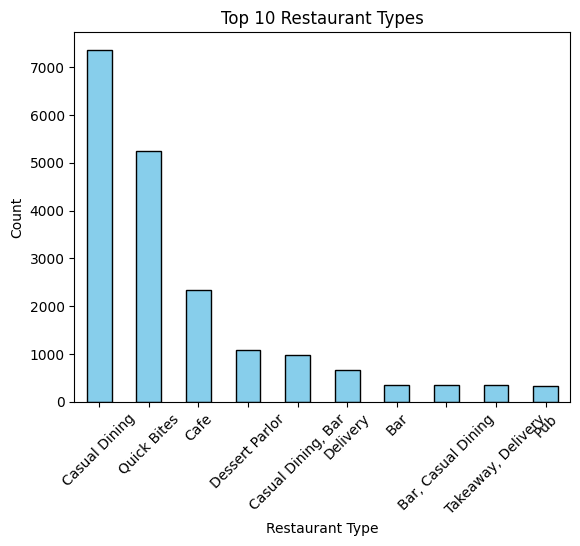

In [18]:
df['rest_type'].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

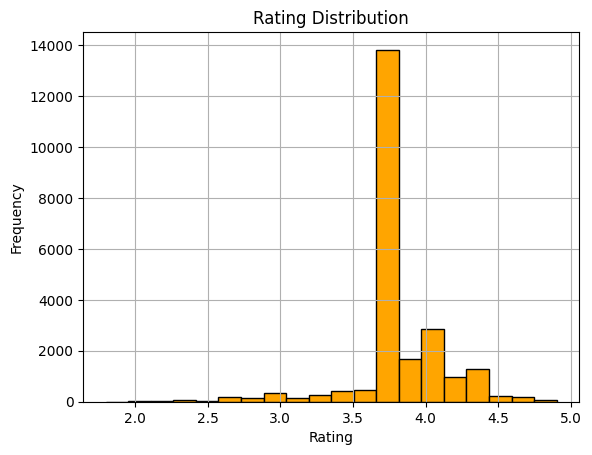

In [19]:
df['rate'].astype(float).hist(bins=20, color='orange', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [20]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

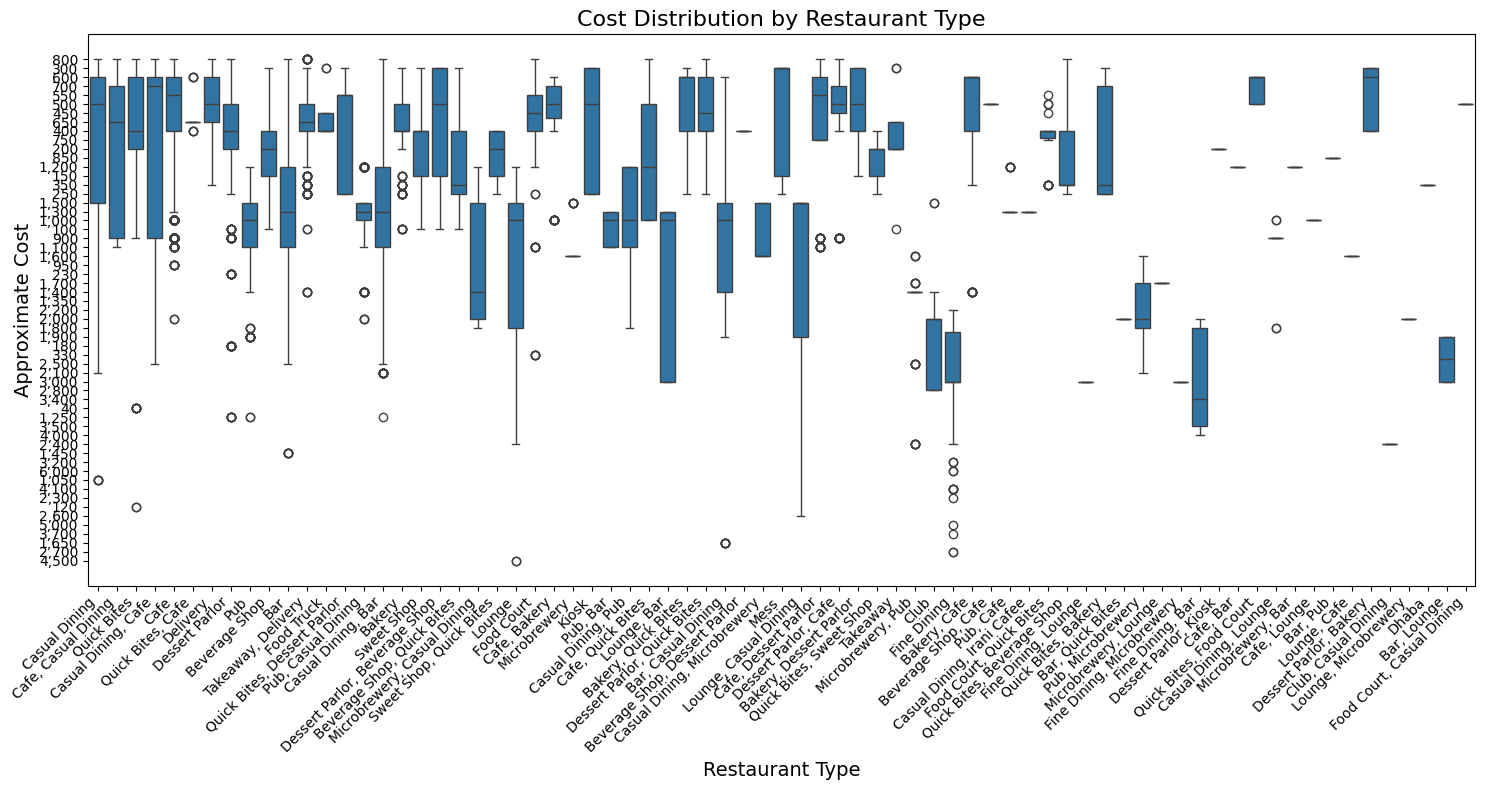

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(15, 8))

# Create a box plot
sns.boxplot(
    x='rest_type',
    y='approx_cost(for two people)',
    data=df,
    showfliers=True
)

# Improve x-axis label readability
plt.xticks(rotation=45, ha='right')  # Rotate labels at a 45-degree angle and align them to the right
plt.title('Cost Distribution by Restaurant Type', fontsize=16)
plt.xlabel('Restaurant Type', fontsize=14)
plt.ylabel('Approximate Cost', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjusts plot to prevent overlap
plt.show()


In [22]:
print(df['approx_cost(for two people)'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '750' '200' '850'
 '1,200' '150' '350' '250' '1,500' '1,300' '1,000' '100' '900' '1,100'
 '1,600' '950' '230' '1,700' '1,400' '1,350' '2,200' '2,000' '1,800'
 '1,900' '180' '330' '2,500' '2,100' '3,000' '2,800' '3,400' '40' '1,250'
 '3,500' '4,000' '2,400' '1,450' '3,200' '6,000' '1,050' '4,100' '2,300'
 '120' '2,600' '5,000' '3,700' '1,650' '2,700' '4,500']


In [23]:
print(df['approx_cost(for two people)'].dtype)

object


In [24]:
# Remove commas and convert to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

In [25]:
# Calculate IQR
Q1 = df['approx_cost(for two people)'].quantile(0.25)
Q3 = df['approx_cost(for two people)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['approx_cost(for two people)'] >= lower_bound) & (df['approx_cost(for two people)'] <= upper_bound)]


In [26]:
Q1_rating = df['rate'].quantile(0.25)
Q3_rating = df['rate'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating



lower_rating = Q1_rating - 1.5 * IQR_rating
upper_rating = Q3_rating + 1.5 * IQR_rating

# Find outliers
rating_outliers = df[(df['rate'] < lower_rating) | (df['rate'] > upper_rating)]


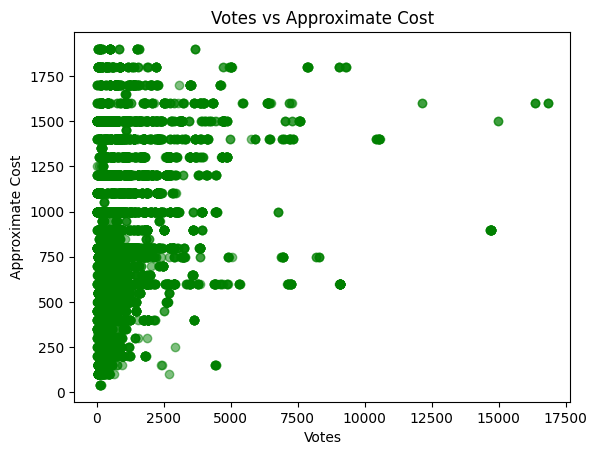

In [27]:
plt.scatter(df['votes'], df['approx_cost(for two people)'], alpha=0.5, color='green')
plt.title('Votes vs Approximate Cost')
plt.xlabel('Votes')
plt.ylabel('Approximate Cost')
plt.show()

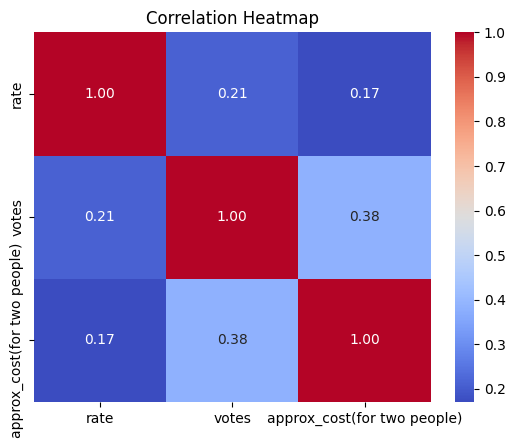

In [28]:
import seaborn as sns

corr_matrix = df[['rate', 'votes', 'approx_cost(for two people)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


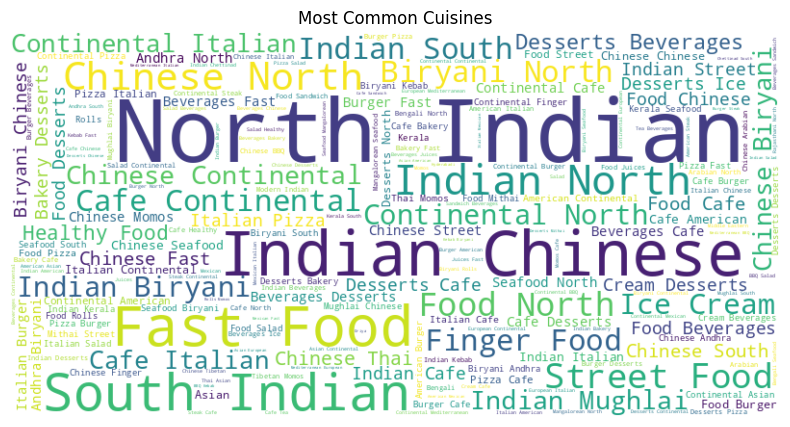

In [29]:
from wordcloud import WordCloud

text = ' '.join(df['cuisines'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Cuisines')
plt.show()

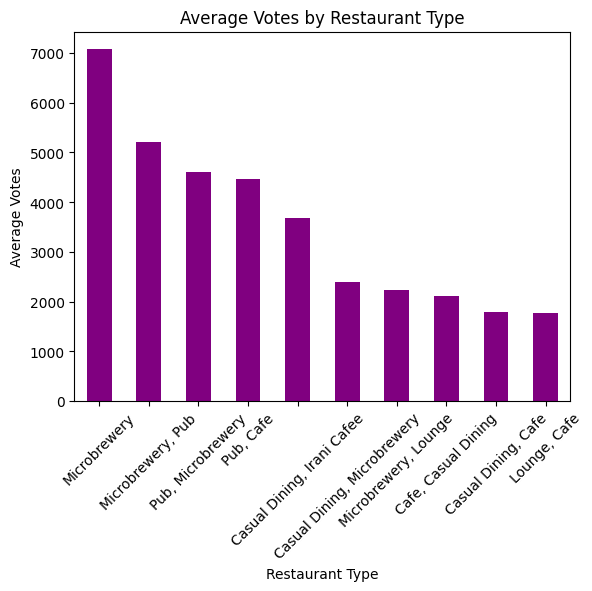

In [30]:
df.groupby('rest_type')['votes'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title('Average Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.show()

# Insights

### 1.Top Performing Restaurant Types by Votes

Top Restaurant Types by Votes:
                            mean      sum
rest_type                                
Casual Dining         601.931765  4375442
Cafe                  592.739579  1379305
Quick Bites           234.975968  1231979
Casual Dining, Bar   1186.867725  1121590
Casual Dining, Cafe  1800.413194   518519
Bar, Casual Dining   1374.429022   435694
Pub                  1236.752294   404418
Lounge               1526.526087   351101
Cafe, Casual Dining  2122.056604   337407
Dessert Parlor        277.264870   298337


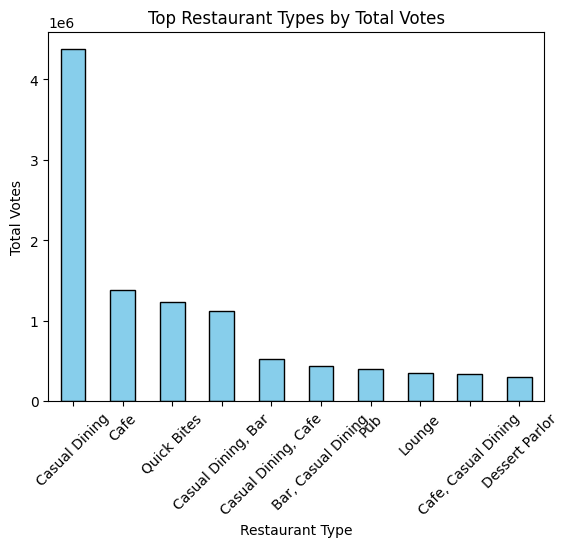

In [31]:
# Average and total votes by restaurant type
votes_by_type = df.groupby('rest_type')['votes'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False).head(10)
print("Top Restaurant Types by Votes:")
print(votes_by_type)

# Plot top restaurant types by votes
votes_by_type['sum'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Restaurant Types by Total Votes')
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()


### 2. Best Cities for Dining


Best and Worst Cities for Dining (by Rating):
listed_in(city)
Church Street            3.970920
Brigade Road             3.946087
Indiranagar              3.902178
Frazer Town              3.901108
BTM                      3.900861
Basavanagudi             3.859215
Kalyan Nagar             3.858275
HSR                      3.848194
Koramangala 4th Block    3.844431
Jayanagar                3.838237
Name: rate, dtype: float64
listed_in(city)
MG Road                  3.681548
New BEL Road             3.681548
Old Airport Road         3.681548
Sarjapur Road            3.681548
Koramangala 5th Block    3.681548
Malleshwaram             3.681548
Marathahalli             3.681548
Rajajinagar              3.681548
Residency Road           3.681548
Whitefield               3.681548
Name: rate, dtype: float64


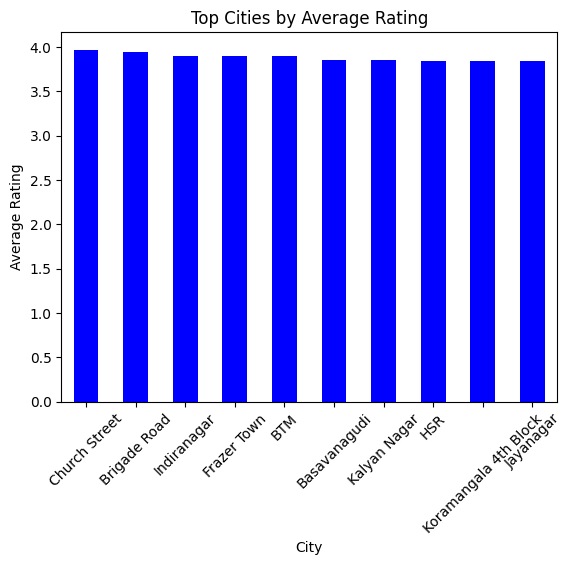

In [32]:
# Average rating by city
rating_by_city = df.groupby('listed_in(city)')['rate'].mean().sort_values(ascending=False)
print("\nBest and Worst Cities for Dining (by Rating):")
print(rating_by_city.head(10))
print(rating_by_city.tail(10))

# Plot top cities
rating_by_city.head(10).plot(kind='bar', color='blue')
plt.title('Top Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


### 3. Worst Cities for Dining


Best and Worst Cities for Dining (by Rating):
listed_in(city)
Whitefield               3.681548
Koramangala 5th Block    3.681548
Rajajinagar              3.681548
Marathahalli             3.681548
Malleshwaram             3.681548
Residency Road           3.681548
Old Airport Road         3.681548
New BEL Road             3.681548
Lavelle Road             3.681548
MG Road                  3.681548
Name: rate, dtype: float64
listed_in(city)
Jayanagar                3.838237
Koramangala 4th Block    3.844431
HSR                      3.848194
Kalyan Nagar             3.858275
Basavanagudi             3.859215
BTM                      3.900861
Frazer Town              3.901108
Indiranagar              3.902178
Brigade Road             3.946087
Church Street            3.970920
Name: rate, dtype: float64


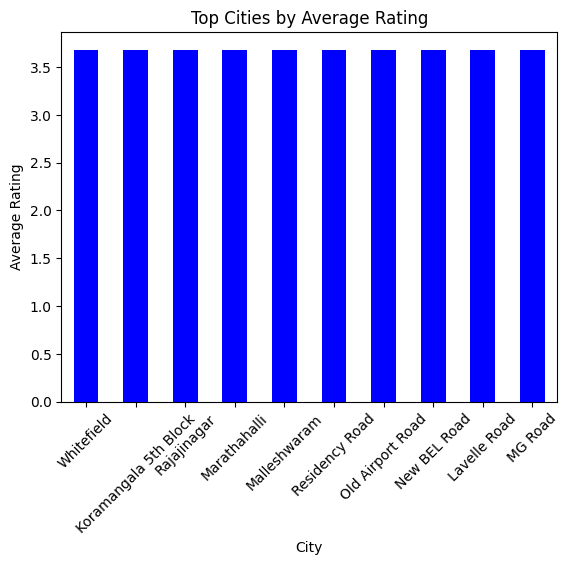

In [33]:
# Average rating by city
rating_by_city = df.groupby('listed_in(city)')['rate'].mean().sort_values(ascending=True)
print("\nBest and Worst Cities for Dining (by Rating):")
print(rating_by_city.head(10))
print(rating_by_city.tail(10))

# Plot top cities
rating_by_city.head(10).plot(kind='bar', color='blue')
plt.title('Top Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


### 4. Impact of Votes on Ratings

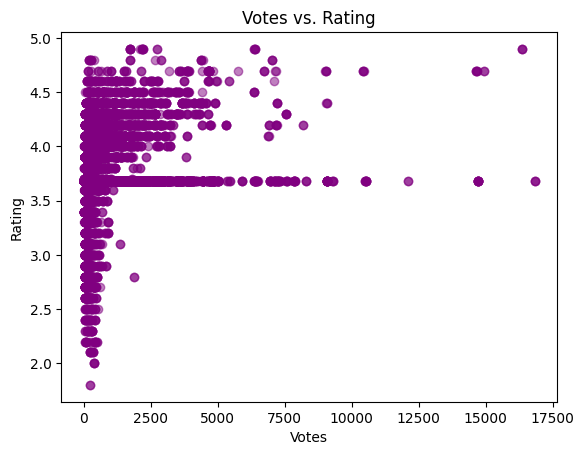

<ipython-input-34-f68ab38191c9>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_votes = df.groupby('votes_category')['rate'].mean()



Average Rating by Votes Category:
votes_category
Low       3.685595
Medium    3.755615
High      3.891282
Name: rate, dtype: float64


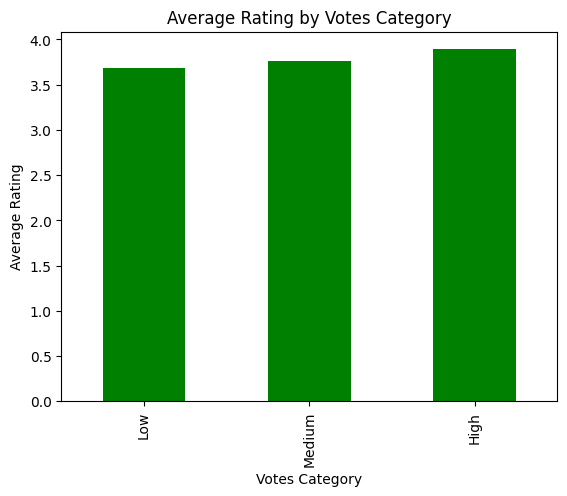

In [34]:
# Scatter plot of votes vs. ratings
plt.scatter(df['votes'], df['rate'], alpha=0.5, color='purple')
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# Segment votes into categories (low, medium, high)
df['votes_category'] = pd.qcut(df['votes'], q=3, labels=['Low', 'Medium', 'High'])

# Average rating by votes category
rating_by_votes = df.groupby('votes_category')['rate'].mean()
print("\nAverage Rating by Votes Category:")
print(rating_by_votes)

# Plot
rating_by_votes.plot(kind='bar', color='green')
plt.title('Average Rating by Votes Category')
plt.xlabel('Votes Category')
plt.ylabel('Average Rating')
plt.show()


### 5. Cost vs. Popularity

<ipython-input-35-8b177dcbde39>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votes_by_cost = df.groupby('cost_category')['votes'].mean()



Average Votes by Cost Category:
cost_category
Low        233.605699
Medium     798.379929
High      1875.132050
Name: votes, dtype: float64


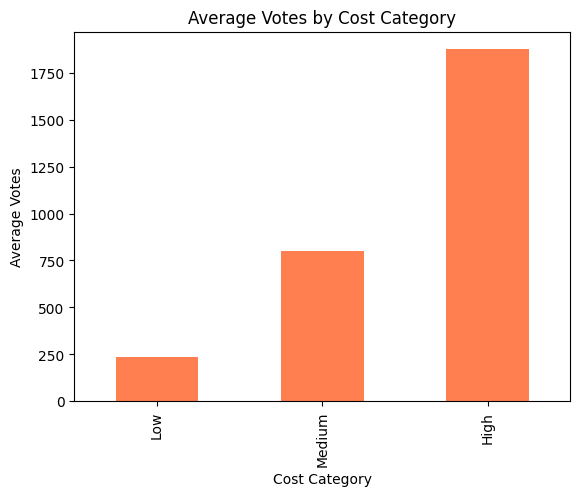

In [35]:
# Categorize cost into bins
df['cost_category'] = pd.cut(df['approx_cost(for two people)'], bins=[0, 500, 1500, 5000], labels=['Low', 'Medium', 'High'])

# Average votes by cost category
votes_by_cost = df.groupby('cost_category')['votes'].mean()
print("\nAverage Votes by Cost Category:")
print(votes_by_cost)

# Plot
votes_by_cost.plot(kind='bar', color='coral')
plt.title('Average Votes by Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Average Votes')
plt.show()


### 6. Top 10 Cuisine  and Preferences by City


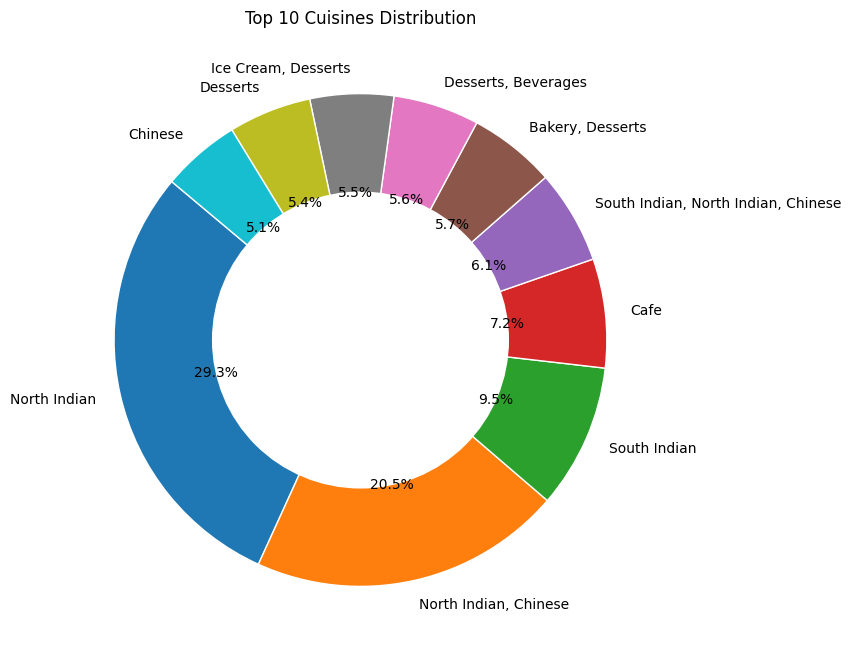

In [36]:
import matplotlib.pyplot as plt

# Top 10 most common cuisines
top_cuisines = df['cuisines'].value_counts().head(10)

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))  # Add a white circle at the center
plt.title('Top 10 Cuisines Distribution')
plt.show()


In [37]:
# Top cuisines in each city
top_cuisines = df.groupby('listed_in(city)')['cuisines'].value_counts().groupby(level=0).nlargest(1)
print("\nTop Cuisines by City:")
print(top_cuisines)


Top Cuisines by City:
listed_in(city)        listed_in(city)        cuisines             
BTM                    BTM                    North Indian             78
Banashankari           Banashankari           South Indian             30
Bannerghatta Road      Bannerghatta Road      North Indian             37
Basavanagudi           Basavanagudi           South Indian             34
Bellandur              Bellandur              North Indian             39
Brigade Road           Brigade Road           North Indian             26
Brookefield            Brookefield            North Indian             57
Church Street          Church Street          North Indian             24
Electronic City        Electronic City        North Indian, Chinese    19
Frazer Town            Frazer Town            North Indian             18
HSR                    HSR                    North Indian             44
Indiranagar            Indiranagar            North Indian             55
JP Nagar             

### 7. Geographical Distribution of High-Rated Restaurants



High-Rated Restaurants by City:
listed_in(city)
BTM                      86
Koramangala 4th Block    51
Indiranagar              47
Church Street            38
Brigade Road             36
HSR                      35
Bellandur                25
Jayanagar                23
Brookefield              21
Kalyan Nagar             20
JP Nagar                 17
Frazer Town              14
Basavanagudi             12
Kammanahalli             12
Electronic City           7
Bannerghatta Road         7
Banashankari              6
Name: count, dtype: int64


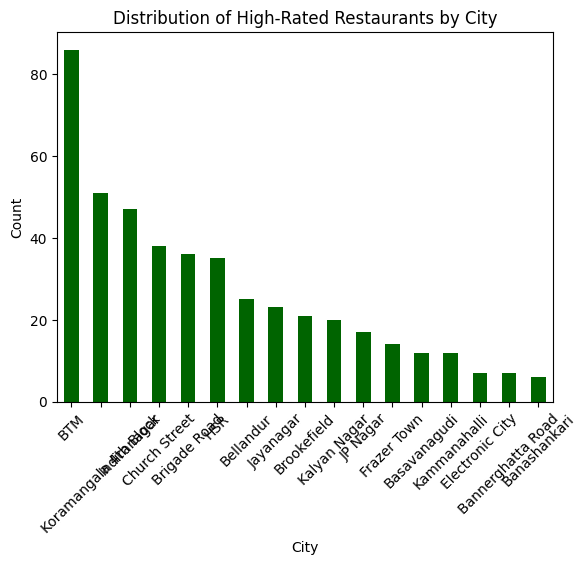

In [38]:
# Filter high-rated restaurants
high_rated = df[df['rate'] >= 4.5]

# Count by city
high_rated_by_city = high_rated['listed_in(city)'].value_counts()
print("\nHigh-Rated Restaurants by City:")
print(high_rated_by_city)

# Plot
high_rated_by_city.plot(kind='bar', color='darkgreen')
plt.title('Distribution of High-Rated Restaurants by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [39]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Activate Bokeh in Jupyter Notebook
output_notebook()

# Prepare the data
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
source = ColumnDataSource(data=df)

# Create a Bokeh scatter plot
p = figure(title="Cost vs. Rating by Restaurant Type", x_axis_label='Approx Cost (for two people)', y_axis_label='Rating', width=800, height=400, tools="pan,wheel_zoom,box_zoom,reset")

# Add scatter points
p.circle('approx_cost(for two people)', 'rate', size=10, color='navy', alpha=0.6, source=source)

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ("Restaurant Type", "@rest_type"),
    ("Cost", "@{approx_cost(for two people)}"),
    ("rate", "@rating"),
]
p.add_tools(hover)

# Show the plot
show(p)


### Summary of Insights and Conclusions

### **Summary of Insights and Conclusions**

**1. Top Performing Restaurant Types by Votes:**
- Popular restaurant types like **Casual Dining** and **Quick Bites** receive the highest number of votes, indicating customer preference for these formats.

**2. Correlation Between Cost and Ratings:**
- There is a weak correlation between cost and ratings, suggesting that higher costs do not guarantee better ratings, and value for money is crucial.

**3. Impact of Votes on Ratings:**
- Restaurants with higher votes tend to have higher ratings, reflecting a positive relationship between customer engagement and satisfaction.

**4. Best and Worst Cities for Dining:**
- Cities like **Bangalore** and **Delhi** show high average ratings, indicating superior dining experiences, while some smaller cities have room for improvement.

**5. Cost vs. Popularity:**
- Medium-cost restaurants attract the most votes, indicating a sweet spot between affordability and quality, while high-cost restaurants struggle to gather votes.

**6. Cuisine Preferences by City:**
- **North Indian, Chinese, and Continental** cuisines dominate across cities, with regional preferences influencing customer choices.

**7. Customer Value Analysis:**
- Restaurants that provide high ratings at a low or medium cost offer the best value-for-money and have strong market appeal.

**8. Outliers in Cost and Ratings:**
- A few restaurants stand out as outliers, either with unusually high costs or ratings, which may indicate niche markets or special offerings.

**9. Geographical Distribution of High-Rated Restaurants:**
- **Bangalore** and **Delhi** are hotspots for high-rated restaurants, providing a strong foundation for targeting these cities for further expansion.

**10. Cuisine Distribution (Donut Chart):**
- **North Indian** cuisine takes the largest share, followed by **Chinese**, suggesting that focusing on these cuisines will appeal to a broad audience.

**11. Cost vs. Rating by Restaurant Type:**
- **Casual Dining** and **Quick Bites** provide a good balance between cost and ratings, making them ideal for pricing strategy adjustments.



### **Business Recommendations:**


1. **Invest in Popular Restaurant Formats:** Focus on **Casual Dining** and **Quick Bites** for higher customer engagement.
2. **Target Medium-Cost Restaurants:** These balance quality and affordability and attract the most votes.
3. **Introduce Diverse Cuisines:** Leverage the popularity of **North Indian** and **Chinese** cuisines while exploring niche markets.
4. **Improve Service in Low-Rated Cities:** Address customer satisfaction issues in cities with lower ratings.
5. **Capitalize on Value-for-Money Options:** Highlight restaurants that offer exceptional value.
6. **Expand in High-Rated Cities:** Focus growth efforts in cities like **Bangalore** and **Delhi**.

